In [2]:
!pip install qutip
import qutip as qt

qt.cite()

@misc{qutip5,
  title = {{QuTiP} 5: The Quantum Toolbox in {Python}},
  author = {Lambert, Neill and Giguère, Eric and Menczel, Paul and Li, Boxi
    and Hopf, Patrick and Suárez, Gerardo and Gali, Marc and Lishman, Jake
    and Gadhvi, Rushiraj and Agarwal, Rochisha and Galicia, Asier
    and Shammah, Nathan and Nation, Paul D. and Johansson, J. R.
    and Ahmed, Shahnawaz and Cross, Simon and Pitchford, Alexander
    and Nori, Franco},
  year={2024},
  eprint={2412.04705},
  archivePrefix={arXiv},
  primaryClass={quant-ph},
  url={https://arxiv.org/abs/2412.04705},
  doi={10.48550/arXiv.2412.04705},
}


10.0%. Run time:   0.08s. Est. time left: 00:00:00:00
20.0%. Run time:   0.12s. Est. time left: 00:00:00:00
30.0%. Run time:   0.16s. Est. time left: 00:00:00:00
40.0%. Run time:   0.23s. Est. time left: 00:00:00:00
50.0%. Run time:   0.32s. Est. time left: 00:00:00:00
60.0%. Run time:   0.51s. Est. time left: 00:00:00:00
70.0%. Run time:   1.09s. Est. time left: 00:00:00:00
80.0%. Run time:   2.92s. Est. time left: 00:00:00:00
90.0%. Run time:   8.68s. Est. time left: 00:00:00:00
100.0%. Run time:  26.81s. Est. time left: 00:00:00:00
Total run time:  26.81s
10.0%. Run time:   0.03s. Est. time left: 00:00:00:00
20.0%. Run time:   0.06s. Est. time left: 00:00:00:00
30.0%. Run time:   0.10s. Est. time left: 00:00:00:00
40.0%. Run time:   0.17s. Est. time left: 00:00:00:00
50.0%. Run time:   0.29s. Est. time left: 00:00:00:00
60.0%. Run time:   0.48s. Est. time left: 00:00:00:00
70.0%. Run time:   1.10s. Est. time left: 00:00:00:00
80.0%. Run time:   2.98s. Est. time left: 00:00:00:00
90.

<Figure size 640x480 with 0 Axes>

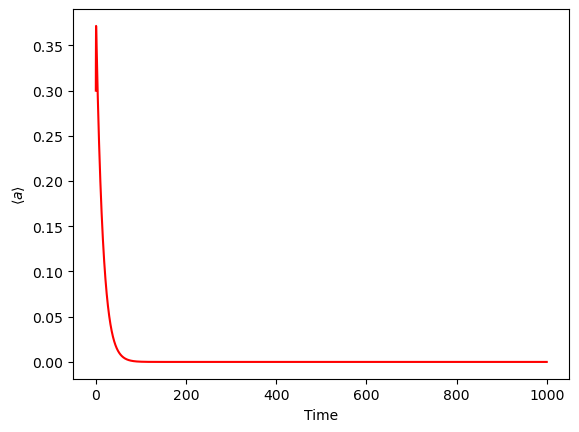

<Figure size 640x480 with 0 Axes>

In [185]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import random 
import scipy
from scipy.linalg import expm, sinm, cosm
from qutip import *

#Creating random initial coherent state to start in
#alpha_re = random.random() * random.choice([-1, 1])
#alpha_im = random.random() * random.choice([-1, 1])
#alpha = alpha_re + alpha_im*1j
#rho0 = qt.coherent_dm(systemSize, alpha)

k = 4
m = 4
systemSize = 15

#Defining operators 
a = qt.destroy(systemSize)
aM = a**m

aDagger = qt.create(systemSize)
aDaggerM = aDagger**m

n_hat = aDagger* a
M_joint = (aDagger**m)*(a**m)
identity = qt.qeye(systemSize)

#Defining parameters 
gamma1 = 1
gammaM = gamma1/10
delta = 0.4 * gamma1
eta = 0.5
theta = 0
beta = 3

# Defining master equation 

# Hamiltonian
Hamiltonian = (delta * n_hat) + (1j * eta) * (a**k * np.exp(1j * theta * k) - aDagger**k * np.exp(-1j * theta * k))
    
# Collapse operators
c_ops = [np.sqrt(gamma1) * a, np.sqrt(gammaM) * aM]

# Liouvillian
L = qt.liouvillian(Hamiltonian, c_ops, data_only=False, chi=None)

in_cor = 0.3

# List of alpha values
alpha_values = {
    'alpha1': - in_cor - in_cor*1j,
    'alpha2': - in_cor + in_cor*1j,
    'alpha3': + in_cor - in_cor*1j,
    'alpha4': + in_cor + in_cor*1j
}

# Dictionary to store results
results = {}

# Time span for the state evolution
time_list = np.logspace(-2, 3, 10000)

# Solver options
options = qt.Options(nsteps=20000, progress_bar=True)



# Loop over each alpha value
for alpha_name, alpha in alpha_values.items():
    # Initial state
    rho0 = qt.coherent(systemSize, alpha=alpha)
    
    # Solve the master equation
    result = qt.mesolve(L, rho0, time_list, options=options)
    
    # Store the result
    results[alpha_name] = result

# Now you can access the results for each alpha value
for alpha_name, result in results.items():
    print(f"Results for {alpha_name}:")
    print(result.expect)

plt.plot(time_list, expect(a, result.states), label=r'Re$\langle a \rangle$',color = 'red')
plt.xlabel('Time')
plt.ylabel(r'$\langle a \rangle$')
plt.figure()

Text(0.5, 1.0, 'Evolutions of ⟨a⟩')

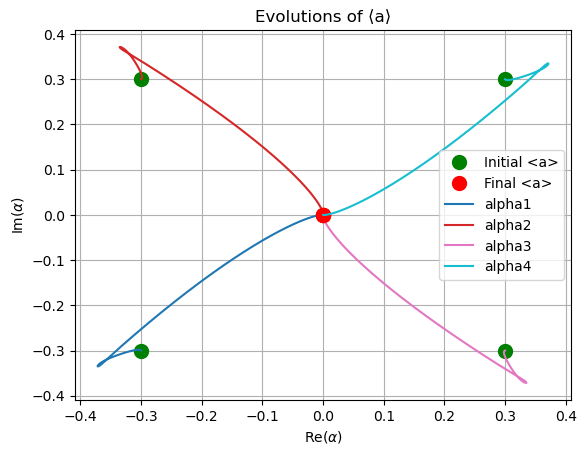

In [186]:
# Loop through the results dictionary
for alpha_name, result in results.items():
    # Calculate the expectation value of 'a' for the current alpha
    expect_a = qt.expect(a, result.states)
    
    # Extract the real and imaginary parts
    re_part = np.real(expect_a)
    im_part = np.imag(expect_a)
    
    # Define starting and ending points
    re_alpha_0 = re_part[0]
    im_alpha_0 = im_part[0]
    re_alpha_f = re_part[-1]
    im_alpha_f = im_part[-1]
    
    # Plot the evolution for the current alpha
    #plt.figure()

    if alpha_name == 'alpha1':
        
        plt.plot(re_alpha_0, im_alpha_0, 'go', markersize=10, markeredgecolor="green",
                 markerfacecolor="green", label = 'Initial <a>')
        plt.plot(re_alpha_f, im_alpha_f, 'go', markersize=10, markeredgecolor="red", 
                 markerfacecolor="red", label = 'Final <a>')
    else:
        plt.plot(re_alpha_0, im_alpha_0, marker="o", markersize=10, markeredgecolor="green", markerfacecolor="green")
        plt.plot(re_alpha_f, im_alpha_f, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
    plt.plot(re_part, im_part, label= f'{alpha_name}')
    plt.grid(True)
    plt.legend()
    #plt.show()

plt.xlabel('Re('r'$\alpha$'')')
plt.ylabel('Im('r'$\alpha$'')')
plt.title('Evolutions of ⟨a⟩')

In [ ]:
P0 = qt.fock_dm(systemSize, 0)  # Projector for ground state |0><0|
P1 = qt.fock_dm(systemSize, 1)  # Projector for first excited state |1><1|
P2 = qt.fock_dm(systemSize, 2)
P4 = qt.fock_dm(systemSize, 4)
P8 = qt.fock_dm(systemSize, 8)

pop0 = [qt.expect(P0, state) for state in result.states]  # Population of |0><0|
pop1 = [qt.expect(P1, state) for state in result.states]  # Population of |1><1|
pop2 = [qt.expect(P2, state) for state in result.states]  # Population of |1><1|
pop4 = [qt.expect(P4, state) for state in result.states]  # Population of |4<4|
pop8 = [qt.expect(P8, state) for state in result.states]  # Population of |8><8|

plt.plot(time_list, pop0, label=r'$\rho_{00}$')
plt.plot(time_list, pop1, label=r'$\rho_{11}$')
plt.plot(time_list, pop2, label=r'$\rho_{22}$')
#plt.plot(time_list, pop4, label=r'$\rho_{44}$')
plt.plot(time_list, pop8, label=r'$\rho_{88}$')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.xscale('log')  # Since time_list is in logspace
plt.show()

a_exp = [qt.expect(a, state) for state in result.states]  # Population of |8><8|
plt.plot(time_list, a_exp, label=r'$\langle a \rangle$')
plt.xlabel('Time')
plt.ylabel(r'$\langle a \rangle$')
plt.legend()
plt.xscale('log')  # Since time_list is in logspace
plt.show()

In [ ]:
states = result.states  # List of density matrices

# Extract the (0,1) element (coherence term ρ_01)
re_parts_23 = [state.full()[2, 3].real for state in states]  # Real part of ρ_23
im_parts_23 = [state.full()[2, 3].imag for state in states]  # Imaginary part of ρ_23

# Plot trajectory in complex plane
plt.figure(figsize=(6, 6))
plt.plot(re_parts_23, im_parts_23, marker='.', linestyle='')

plt.xlabel("Re(ρ_23)")
plt.ylabel("Im(ρ_23)")
plt.title("Evolution of Coherence Term (ρ_23) in Complex Plane")
plt.grid()
plt.show()